# Segmenting and Clustering Neighborhoods in Toronto
by Hugo Bertini @ 2020.05.24

#### **this is part 1/3 of the assignment. "Scraping into a Dataframe"**   
We will begin to scrape the [List of postal codes of Canada: M](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) into a pandas Dataframe:


_first we import the libraries we need:_

In [1]:
#first we import the libraries we need:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

_then we perform the request:_

In [2]:
#then we perform the request:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response = requests.get(url)
print(response)

#a response of 200 means we received the page we asked for, so let's continue:
soup = BeautifulSoup(response.text, "html.parser")

<Response [200]>


_now that we have our soup ready, let's see what tables are available:_

In [3]:
#now that we have our soup ready, let's see what tables are available.
#as the output might be too unpratically big for dispaly we will limit it to 500 characters:
str(soup.findAll('table'))[0:500]

'[<table class="wikitable sortable">\n<tbody><tr>\n<th>Postal Code\n</th>\n<th>Borough\n</th>\n<th>Neighborhood\n</th></tr>\n<tr>\n<td>M1A\n</td>\n<td>Not assigned\n</td>\n<td>\n</td></tr>\n<tr>\n<td>M2A\n</td>\n<td>Not assigned\n</td>\n<td>\n</td></tr>\n<tr>\n<td>M3A\n</td>\n<td>North York\n</td>\n<td>Parkwoods\n</td></tr>\n<tr>\n<td>M4A\n</td>\n<td>North York\n</td>\n<td>Victoria Village\n</td></tr>\n<tr>\n<td>M5A\n</td>\n<td>Downtown Toronto\n</td>\n<td>Regent Park, Harbourfront\n</td></tr>\n<tr>\n<td>M6A\n</td>\n<td>North York\n</td>\n<td>'

_it looks like our table is the first one! so let's grab it and extract the data:_

In [4]:
#it looks like our table is the first one. let's grab it and extract the data:
pc_table = soup.find_all('table')[0]
pc_table_body = pc_table.find('tbody')
pc_table_rows = pc_table_body.find_all('tr')
table = []

#getting the table headers:
headers = pc_table_rows[0].find_all('th')
table.append([h.text.strip() for h in headers])

#getting the table data rows:
for row in pc_table_rows[1:]:
    cols = row.find_all('td')
    cols = [txt.text.strip() for txt in cols]
    #table.append([txt for txt in cols if txt])  # empty items are not added
    table.append([txt for txt in cols])
    
table[0:15]

[['Postal Code', 'Borough', 'Neighborhood'],
 ['M1A', 'Not assigned', ''],
 ['M2A', 'Not assigned', ''],
 ['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Regent Park, Harbourfront'],
 ['M6A', 'North York', 'Lawrence Manor, Lawrence Heights'],
 ['M7A', 'Downtown Toronto', "Queen's Park, Ontario Provincial Government"],
 ['M8A', 'Not assigned', ''],
 ['M9A', 'Etobicoke', 'Islington Avenue, Humber Valley Village'],
 ['M1B', 'Scarborough', 'Malvern, Rouge'],
 ['M2B', 'Not assigned', ''],
 ['M3B', 'North York', 'Don Mills'],
 ['M4B', 'East York', 'Parkview Hill, Woodbine Gardens'],
 ['M5B', 'Downtown Toronto', 'Garden District, Ryerson']]

_now we can create a pandas Dataframe:_

In [5]:
#now we can create our pandas Dataframe:

trtPC_df1 = pd.DataFrame(table[1:], columns=table[0])
print('table shape: {} rows x {} columns'.format(trtPC_df1.shape[0], trtPC_df1.shape[1]))
trtPC_df1.head(10)

table shape: 180 rows x 3 columns


,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


**now we will wrangle the dataframe to have it ready for proper analysis:**

_Ignore empty cells and the ones with a borough that is 'Not assigned':_

In [6]:
#let's discard rows whose Borough field is either empty or "Not assigned":

trtPC_df1 = trtPC_df1[(trtPC_df1.Borough.notnull()) & (trtPC_df1['Borough']!='Not assigned')]
print(trtPC_df1.shape)
trtPC_df1.head()

(103, 3)


,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


_for cases of empty or not assigned neighborhood, it will become the same as the borough:_

In [7]:
#although it looks like the original table in the wiki was cleaned up in advance, 
#we still treat those cases just in case the table is changed at origin:

trtPC_df1['Neighborhood'] = np.where((trtPC_df1['Neighborhood'].eq('Not assigned')) | (trtPC_df1['Neighborhood'].eq('')), trtPC_df1['Borough'], trtPC_df1['Neighborhood'])
trtPC_df1.head(15)

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


_More than one neighborhood go to the same postal code line:_

In [8]:
#here we alter the data in one cell to cause having more than 1 line with repeated postal code, so we can check the code is right
#this cell will be fully commented once testing is fine, so we don't actually alter the data.
#we're doing this just because the table in the wiki page already has the neighborhoods as a list for the 103 that are not empty or not assigned.

#trtPC_df1.iloc[1, 0]='M3A'
#trtPC_df1.head()

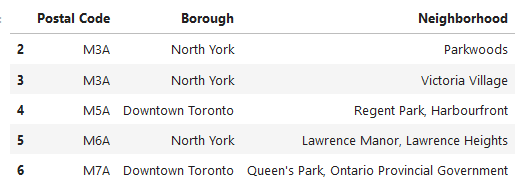

_now we will aggregate the neighborhoods belonging to the same postal code
in order to have one row per postal code and the corresponding neighborhoods listed in the 'Neighborhood' column.
and again, this seems to have been done in the original table, but we will process the data just in case the original table changes in the future:_

In [9]:
#let's group by the postal code column and aggregate borough and neighborhood columns respectively to keep the first borough in each group, and the list of neighborhoods
trtPC_df = trtPC_df1.groupby(['Postal Code']).agg({'Borough':"first", 'Neighborhood':list}).reset_index()

In [10]:
#next we will get rid of the list representation brackets from the neighborhood column.
#please note the data corresponds to the original and not to the tweaked data used in testing this.
trtPC_df['Neighborhood'] = trtPC_df['Neighborhood'].apply(lambda n: ', '.join(n))
trtPC_df.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [11]:
#now let's check how the M3A postal code line became after the grouping operations. 
#We expect to have two neighborhoods listed, Parkwoods and Victoria Village.
#this cell is aimed only for testing the code, not for the assignment submission. 
#This cell will be submitted as commented for the assignment.

#trtPC_df[trtPC_df['Postal Code']=='M3A'].head()

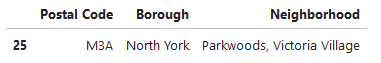

_using the **.shape** method to print the number of rows of our dataframe:_

In [12]:
#let's check the number of rows in the dataframe:
print('The dataframe has {} rows.'.format(trtPC_df.shape[0]))

The dataframe has 103 rows.


#### **this is part 2/3 of the assignment: "Adding geolocation data"**   
Here we add the geolocation data from a csv file into the above-created pandas Dataframe:


#### **this is part 3/3 of the assignment: "Clustering Toronto's neighborhoods"**   
Here we explore and cluster the neighborhoods in Toronto:
